In [9]:
!pip install opencv-contrib-python --upgrade

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import os
cwd = os.getcwd()
print(cwd)

#Change working directory
os.chdir(r'''C:\Users\wscott\Pictures''')
print(cwd)

C:\Users\wscott
C:\Users\wscott


In [3]:
os.listdir()

['1200px-Celgene_logo.svg.png',
 '2019-12',
 '2020-01',
 'atcc-mobile-logo.png',
 'atcc.jfif',
 'ATCC_logo.jpg',
 'Camera Roll',
 'cg life.png',
 'CG-Life-Logo_Grey_RGB.png',
 'desktop.ini',
 'Final Captstone',
 'leaf_image.jfif',
 'Logitech Webcam',
 'logo.png',
 'morgan.jpg',
 'New folder',
 'New folder (2)',
 'New folder (3)',
 'New folder (4)',
 'progenity-1.png',
 'Saved Pictures',
 'tandem.PNG',
 'toyo-logo-web-EN.png',
 'toyo.png',
 'us-cellular1.png']

In [4]:
import cv2, matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [100]:
# read an image
base_leaf_img = cv2.imread('2020-02-06T20_27_34.359693_camera_0.jpg')

# show image format (basically a 3-d array of pixel color info, in BGR format)
print(base_leaf_img)

[[[140 102  78]
  [138 100  76]
  [134  99  73]
  ...
  [ 48  47  37]
  [ 47  44  39]
  [ 46  43  38]]

 [[136 102  78]
  [132 101  76]
  [131 101  74]
  ...
  [ 48  46  38]
  [ 48  45  40]
  [ 47  44  39]]

 [[126 104  76]
  [125 104  76]
  [124 103  75]
  ...
  [ 48  46  38]
  [ 48  44  39]
  [ 48  43  40]]

 ...

 [[203 255 255]
  [205 255 255]
  [211 252 255]
  ...
  [  2  20  19]
  [  0  17  18]
  [  0  13  14]]

 [[203 255 255]
  [205 255 255]
  [211 252 254]
  ...
  [  5  21  20]
  [  0  18  19]
  [  0   9  10]]

 [[204 255 255]
  [205 255 255]
  [211 252 254]
  ...
  [  8  24  23]
  [  3  21  22]
  [  0  10  11]]]


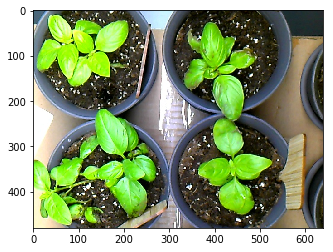

In [8]:
# convert image to RGB color for matplotlib
#base_leaf_img
BGR2RGB_leaf_img = cv2.cvtColor(base_leaf_img, cv2.COLOR_BGR2RGB)

# show image with matplotlib
#plt.imshow(base_leaf_img)
plt.imshow(BGR2RGB_leaf_img)

#numpy_horizontal = np.hstack((base_leaf_img, BGR2RGB_leaf_img))

#plt.imshow('Numpy Horizontal', numpy_horizontal)

In [11]:
# convert image to grayscale
gray_img = cv2.cvtColor(BGR2RGB_leaf_img, cv2.COLOR_RGB2GRAY)

# grayscale image represented as a 2-d array
print(gray_img)

[[ 99  97  95 ...  44  43  42]
 [ 99  97  96 ...  44  44  43]
 [ 98  98  97 ...  44  43  43]
 ...
 [249 249 248 ...  18  15  12]
 [249 249 248 ...  19  16   8]
 [249 249 248 ...  22  19   9]]


In [13]:
# find average per row, assuming image is already in the RGB format.
# np.average() takes in an axis argument which finds the average across that axis.
average_color_per_row = np.average(BGR2RGB_leaf_img, axis=0)

# find average across average per row
average_color = np.average(average_color_per_row, axis=0)

# convert back to uint8
average_color = np.uint8(average_color)
print(average_color)

[105 128  77]


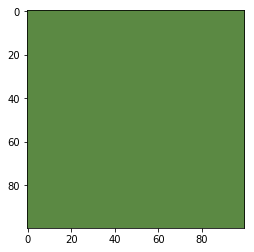

In [49]:
# create 100 x 100 pixel image with average color value
average_color_img = np.array([[average_color]*100]*100, np.uint8)

plt.imshow(average_color_img)

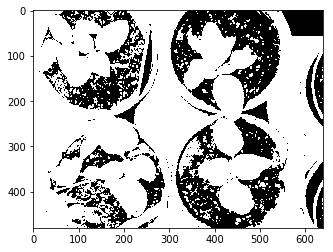

In [14]:
# threshold for image, with threshold 60
_, threshold_img = cv2.threshold(gray_img, 60, 255, cv2.THRESH_BINARY)

# show image
threshold_img = cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB)
plt.imshow(threshold_img)

In [16]:
leaf_hsv = cv2.cvtColor(base_leaf_img, cv2.COLOR_BGR2HSV)
leaf_hsv

array([[[108, 113, 140],
        [108, 115, 138],
        [107, 116, 134],
        ...,
        [ 93,  58,  48],
        [101,  43,  47],
        [101,  44,  46]],

       [[108, 109, 136],
        [107, 108, 132],
        [106, 111, 131],
        ...,
        [ 96,  53,  48],
        [101,  43,  48],
        [101,  43,  47]],

       [[103, 101, 126],
        [103, 100, 125],
        [103, 101, 124],
        ...,
        [ 96,  53,  48],
        [103,  48,  48],
        [109,  43,  48]],

       ...,

       [[ 30,  52, 255],
        [ 30,  50, 255],
        [ 28,  44, 255],
        ...,
        [ 32, 230,  20],
        [ 28, 255,  18],
        [ 28, 255,  14]],

       [[ 30,  52, 255],
        [ 30,  50, 255],
        [ 29,  43, 254],
        ...,
        [ 32, 194,  21],
        [ 28, 255,  19],
        [ 27, 255,  10]],

       [[ 30,  51, 255],
        [ 30,  50, 255],
        [ 29,  43, 254],
        ...,
        [ 32, 170,  24],
        [ 28, 220,  22],
        [ 27, 255,  11]]

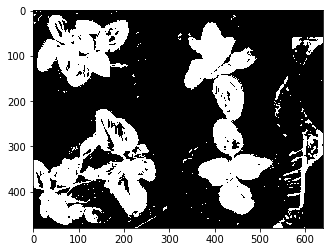

In [17]:
# open new Mondrian Piet painting photo
leaf_hsv = cv2.cvtColor(base_leaf_img, cv2.COLOR_BGR2HSV)

# threshold for hue channel in green range
green_min = np.array([10, 100, 100], np.uint8)
green_max = np.array([ 100, 255, 255], np.uint8)
threshold_green_img = cv2.inRange(leaf_hsv, green_min, green_max)

threshold_green_img = cv2.cvtColor(threshold_green_img, cv2.COLOR_GRAY2RGB)

plt.imshow(threshold_green_img)

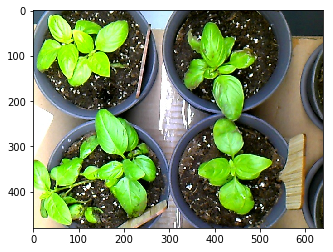

In [18]:
plt.imshow(cv2.cvtColor(leaf_hsv, cv2.COLOR_HSV2RGB))

In [79]:
img_test = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_test

array([[[ 92, 172, 119],
        [ 92, 172, 119],
        [ 91, 171, 118],
        ...,
        [ 30, 104,  70],
        [ 28, 105,  68],
        [ 28, 105,  68]],

       [[ 95, 175, 122],
        [ 94, 174, 121],
        [ 93, 173, 120],
        ...,
        [ 29, 105,  71],
        [ 28, 106,  69],
        [ 29, 106,  69]],

       [[ 99, 179, 126],
        [ 98, 178, 125],
        [ 98, 176, 123],
        ...,
        [ 30, 107,  73],
        [ 28, 108,  71],
        [ 30, 108,  71]],

       ...,

       [[ 74, 161, 103],
        [ 77, 164, 106],
        [ 81, 168, 110],
        ...,
        [  0,  91,  36],
        [  0,  91,  36],
        [  0,  91,  36]],

       [[ 76, 163, 105],
        [ 79, 166, 108],
        [ 82, 169, 111],
        ...,
        [  0,  91,  36],
        [  0,  91,  36],
        [  0,  91,  36]],

       [[ 80, 167, 109],
        [ 81, 168, 110],
        [ 86, 171, 113],
        ...,
        [  0,  90,  37],
        [  0,  90,  37],
        [  0,  90,  37]]

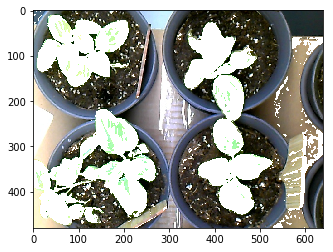

In [21]:
plt.imshow(cv2.cvtColor(leaf_hsv, cv2.COLOR_HSV2RGB))

# get mask of pixels that are in blue range
mask_inverse = cv2.inRange(leaf_hsv, green_min, green_max)

# inverse mask to get parts that are not blue
mask = cv2.bitwise_not(mask_inverse)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))

# convert single channel mask back into 3 channels
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

# perform bitwise and on mask to obtain cut-out image that is not blue
masked_upstate = cv2.bitwise_and(base_leaf_img, mask_rgb)

# replace the cut-out parts with white
masked_replace_white = cv2.addWeighted(masked_upstate, 1, \
                                       cv2.cvtColor(mask_inverse, cv2.COLOR_GRAY2RGB), 1, 0)

plt.imshow(cv2.cvtColor(masked_replace_white, cv2.COLOR_BGR2RGB))

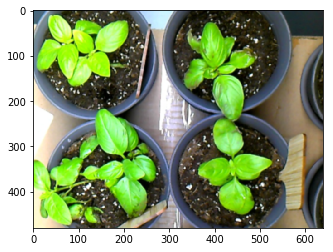

In [29]:
# gaussian blurring with a 5x5 kernel
#BGR2RGB_leaf_img
leaf_blur_small = cv2.GaussianBlur(BGR2RGB_leaf_img, (5,5), 0)
plt.imshow(leaf_blur_small)

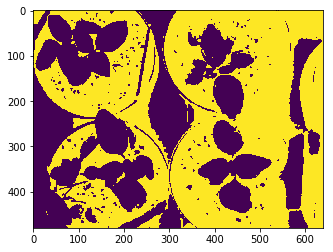

In [179]:
#base_leaf_img = cv2.imread('leaf_image.jfif')
BGR2GRAY_leaf_img =  cv2.cvtColor(base_leaf_img, cv2.COLOR_BGR2GRAY)
leaf_preprocessed = cv2.GaussianBlur(BGR2GRAY_leaf_img, (5, 5), 0)

# get binary image
_, leaf_binary = cv2.threshold(leaf_preprocessed, 130, 255, cv2.THRESH_BINARY)

# invert image to get coins
leaf_binary = cv2.bitwise_not(leaf_binary)
plt.imshow(leaf_binary)


In [25]:
# find contours
leaf_contours, _ = cv2.findContours(leaf_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# make copy of image
leaves_and_contours = np.copy(base_leaf_img)

# find contours of large enough area
min_leaf_area = 60
large_contours = [cnt for cnt in leaves_and_contours if cv2.contourArea(cnt) > min_leaf_area]

# draw contours
cv2.drawContours(leaves_and_contours, large_contours, -1, (255,0,0))

# print number of contours
print('number of leaves: %d' % len(large_contours))

error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\imgproc\src\shapedescr.cpp:274: error: (-215:Assertion failed) npoints >= 0 && (depth == CV_32F || depth == CV_32S) in function 'cv::contourArea'


In [60]:
# create copy of image to draw bounding boxes
bounding_img = np.copy(base_leaf_img)

# for each contour find bounding box and draw rectangle
for contour in large_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(bounding_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

NameError: name 'large_contours' is not defined

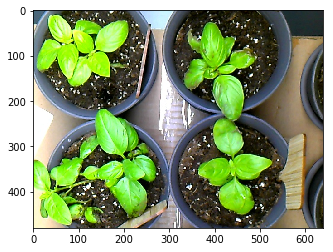

In [28]:
plt.imshow(cv2.cvtColor(base_leaf_img, cv2.COLOR_BGR2RGB))

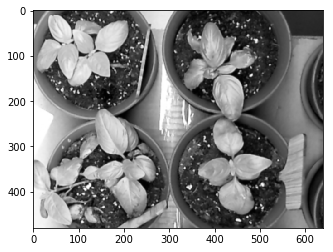

In [31]:
# get binary image and apply Gaussian blur
#coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
coins_preprocessed = cv2.GaussianBlur(BGR2GRAY_leaf_img, (5, 5), 0)

plt.imshow(cv2.cvtColor(coins_preprocessed, cv2.COLOR_GRAY2RGB))

False

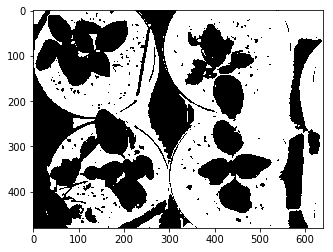

In [32]:

_, coins_binary = cv2.threshold(coins_preprocessed, 130, 255, cv2.THRESH_BINARY)

# invert image to get coins
coins_binary = cv2.bitwise_not(coins_binary)
plt.imshow(cv2.cvtColor(coins_binary, cv2.COLOR_GRAY2RGB))
cv2.imwrite('output/coins-binary.png', coins_binary)

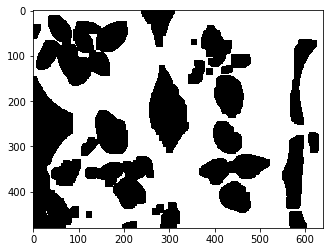

In [142]:
# morph coins by eroding and dilating to remove noise
morph_kernel = np.ones((15,15),np.uint8)
coins_morph = cv2.morphologyEx(coins_binary, cv2.MORPH_CLOSE, morph_kernel)

plt.imshow(cv2.cvtColor(coins_morph, cv2.COLOR_GRAY2RGB))

number of coins: 8


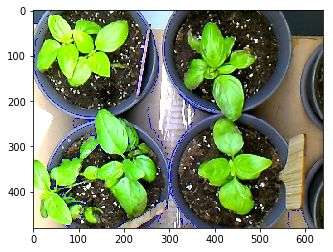

In [35]:
# find contours
coins_contours, _ = cv2.findContours(coins_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# make copy of image
coins_and_contours = np.copy(base_leaf_img)

# find contours of large enough area
min_coin_area = 60
large_contours = [cnt for cnt in coins_contours if cv2.contourArea(cnt) > min_coin_area]

# draw contours
cv2.drawContours(coins_and_contours, large_contours, -1, (255,0,0))

plt.imshow(cv2.cvtColor(coins_and_contours, cv2.COLOR_BGR2RGB))
cv2.imwrite('output/coins-contour.jpg', coins_and_contours)

# print number of contours
print('number of coins: %d' % len(large_contours))

False

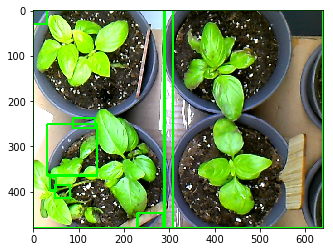

In [37]:

# create copy of image to draw bounding boxes
bounding_img = np.copy(base_leaf_img)

# for each contour find bounding box and draw rectangle
for contour in large_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(bounding_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

plt.imshow(cv2.cvtColor(bounding_img, cv2.COLOR_BGR2RGB))
cv2.imwrite('output/coins-bounding.jpg', bounding_img)

In [38]:
cups_preprocessed  = cv2.cvtColor(cv2.GaussianBlur(base_leaf_img, (7,7), 0), cv2.COLOR_BGR2GRAY)

False

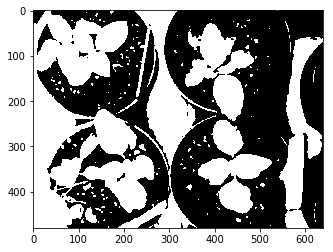

In [39]:
# find binary image with thresholding
low_thresh = 120
high_thresh = 200
_, cups_thresh = cv2.threshold(cups_preprocessed, low_thresh, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(cups_thresh, cv2.COLOR_GRAY2RGB))
cv2.imwrite('output/cups-thresh-low.png', cups_thresh)

_, cups_thresh_hi = cv2.threshold(cups_preprocessed, high_thresh, 255, cv2.THRESH_BINARY)
cv2.imwrite('output/cups-thresh-hi.png', cups_thresh_hi)

False

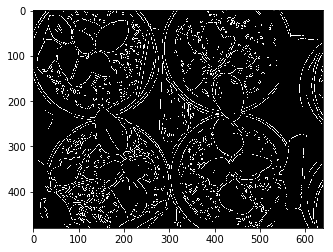

In [45]:
# find binary image with edges
cups_edges = cv2.Canny(cups_preprocessed, threshold1=90, threshold2=110)
plt.imshow(cv2.cvtColor(cups_edges, cv2.COLOR_GRAY2RGB))
cv2.imwrite('output/cups-edges.png', cups_edges)

number of circles detected: 5


False

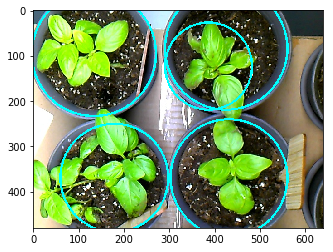

In [65]:

# find hough circles
circles = cv2.HoughCircles(cups_edges, cv2.HOUGH_GRADIENT, dp=1.5, minDist=50, minRadius=80, maxRadius=150)
cups_circles = np.copy(base_leaf_img)

# if circles are detected, draw them
if circles is not None and len(circles) > 0:
    for (x, y, r) in circles[0]:
        x, y, r = int(x), int(y), int(r)
        cv2.circle(cups_circles, (x, y), r, (255, 255, 0), 4)
    plt.imshow(cv2.cvtColor(cups_circles, cv2.COLOR_BGR2RGB))

print('number of circles detected: %d' % len(circles[0]))
cv2.imwrite('output/cups-circles.jpg', base_leaf_img)

In [176]:
import cv2
import numpy as np
def viewImage(image):
    cv2.namedWindow('Display', cv2.WINDOW_NORMAL)
    cv2.imshow('Display', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
def grayscale_17_levels (image):
    high = 255
    while(1):  
        low = high - 15
        col_to_be_changed_low = np.array([low])
        col_to_be_changed_high = np.array([high])
        curr_mask = cv2.inRange(gray, col_to_be_changed_low,col_to_be_changed_high)
        gray[curr_mask > 0] = (high)
        high -= 15
        if(low == 0 ):
            break
image = cv2.imread('2020-02-06T20_27_34.359693_camera_0.jpg')
viewImage(image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
grayscale_17_levels(gray)
viewImage(gray)

In [81]:
def get_area_of_each_gray_level(im):
## convert image to gray scale (must br done before contouring)
    image = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    output = []
    high = 255
    first = True
    while(1):
        low = high - 15
        if(first == False):
            # making values that are of a greater gray level black 
            ## so it won't get detected  
            to_be_black_again_low = np.array([high])
            to_be_black_again_high = np.array([255])
            curr_mask = cv2.inRange(image, to_be_black_again_low, 
            to_be_black_again_high)
            image[curr_mask > 0] = (0)
            
        # making values of this gray level white so we can calculate
        # it's area
        ret, threshold = cv2.threshold(image, low, 255, 0)
        contours, hirerchy = cv2.findContours(threshold, 
        cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
if(len(contours) > 0):
    output.append([cv2.contourArea(contours[0])])
    cv2.drawContours(im, contours, -1, (0,0,255), 3)
    high -= 15
    first = False
if(low == 0 ):
    break
return output

NameError: name 'contours' is not defined

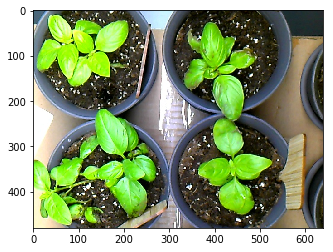

In [101]:
plt.imshow(cv2.cvtColor(base_leaf_img, cv2.COLOR_BGR2RGB))

In [98]:
viewImage(image)

In [83]:
import cv2
import numpy as np
def viewImage(image):
    cv2.namedWindow('Display', cv2.WINDOW_NORMAL)
    cv2.imshow('Display', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [84]:
## getting green HSV color representation
green = np.uint8([[[0, 255, 0 ]]])
green_hsv = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print( green_hsv)

[[[ 60 255 255]]]


In [177]:
image = cv2.imread('2020-02-06T20_27_34.359693_camera_0.jpg')
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
viewImage(hsv_img) ## 1
green_low = np.array([50 , 100, 50] )
green_high = np.array([60, 255, 255])
curr_mask = cv2.inRange(hsv_img, green_low, green_high)
hsv_img[curr_mask > 0] = ([75,255,200])
viewImage(hsv_img) ## 2
## converting the HSV image to Gray inorder to be able to apply 
## contouring
RGB_again = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)
gray = cv2.cvtColor(RGB_again, cv2.COLOR_RGB2GRAY)
viewImage(gray) ## 3
ret, threshold = cv2.threshold(gray, 90, 255, 0)
viewImage(threshold) ## 4

#morph_kernel = np.ones((15,15),np.uint8)
#morph_threshold = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, morph_kernel)
#proper = cv2.cvtColor(morph_threshold, cv2.COLOR_GRAY2RGB)
#viewImage(proper)

contours, hierarchy =  cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, contours, -1, (0, 0, 255), 3)
viewImage(image) ## 5

In [138]:
image = cv2.imread('2020-02-06T20_27_34.359693_camera_0.jpg')

In [126]:
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

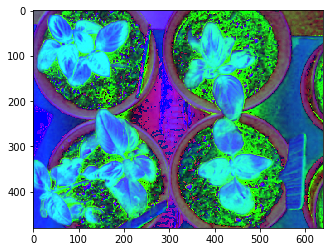

In [130]:
plt.imshow(hsv_img)

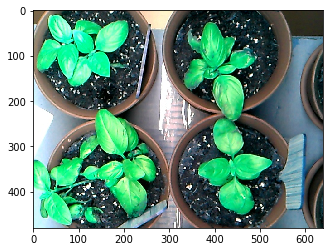

In [117]:
plt.imshow(cv2.imread('2020-02-06T20_27_34.359693_camera_0.jpg'))

In [105]:
def findGreatesContour(contours):
    largest_area = 0
    largest_contour_index = -1
    i = 0
    total_contours = len(contours)
    while (i < total_contours ):
        area = cv2.contourArea(contours[i])
        if(area > largest_area):
            largest_area = area
            largest_contour_index = i
        i+=1
            
    return largest_area, largest_contour_index
# to get the center of the contour
cnt = contours[13]
M = cv2.moments(cnt)
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])
largest_area, largest_contour_index = findGreatesContour(contours)
print(largest_area)
print(largest_contour_index)
print(len(contours))
print(cX)
print(cY)

154988.0
654
1061
491
469


In [164]:
image = cv2.imread('z_H20.Control_camera_2020-02-08T12_52_45.669903.jpg')
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
viewImage(hsv_img) ## 1
green_low = np.array([50 , 100, 50] )
green_high = np.array([60, 255, 255])
curr_mask = cv2.inRange(hsv_img, green_low, green_high)
hsv_img[curr_mask > 0] = ([75,255,200])
viewImage(hsv_img) ## 2
## converting the HSV image to Gray inorder to be able to apply 
## contouring
RGB_again = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)
gray = cv2.cvtColor(RGB_again, cv2.COLOR_RGB2GRAY)
viewImage(gray) ## 3
ret, threshold = cv2.threshold(gray, 90, 255, 0)
viewImage(threshold) ## 4

#morph_kernel = np.ones((15,15),np.uint8)
#morph_threshold = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, morph_kernel)
#proper = cv2.cvtColor(morph_threshold, cv2.COLOR_GRAY2RGB)
#viewImage(proper)

contours, hierarchy =  cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
final_image = cv2.drawContours(image, contours, -1, (0, 0, 255), 3)
viewImage(final_image) ## 5

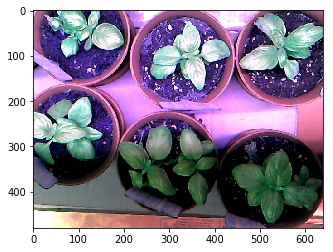

In [174]:
image = cv2.imread('z_H20.Control_camera_2020-02-08T12_52_45.669903.jpg')
plt.imshow(image)

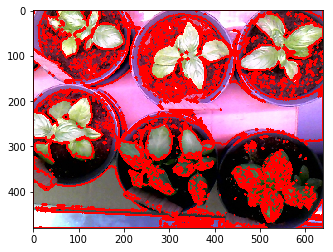

In [173]:
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))

In [168]:
image = cv2.imread('z_N.NPK.P.camera_2020-02-08T12_52_43.269814.jpg')
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
viewImage(hsv_img) ## 1
green_low = np.array([50 , 100, 50] )
green_high = np.array([60, 255, 255])
curr_mask = cv2.inRange(hsv_img, green_low, green_high)
hsv_img[curr_mask > 0] = ([75,255,200])
viewImage(hsv_img) ## 2
## converting the HSV image to Gray inorder to be able to apply 
## contouring
RGB_again = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)
gray = cv2.cvtColor(RGB_again, cv2.COLOR_RGB2GRAY)
viewImage(gray) ## 3
ret, threshold = cv2.threshold(gray, 90, 255, 0)
viewImage(threshold) ## 4

#morph_kernel = np.ones((15,15),np.uint8)
#morph_threshold = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, morph_kernel)
#proper = cv2.cvtColor(morph_threshold, cv2.COLOR_GRAY2RGB)
#viewImage(proper)

contours, hierarchy =  cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
final_image_2 = cv2.drawContours(image, contours, -1, (0, 0, 255), 3)
viewImage(final_image_2) ## 5

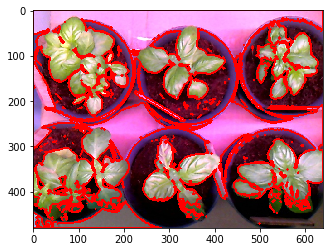

In [175]:
plt.imshow(cv2.cvtColor(final_image_2, cv2.COLOR_BGR2RGB))

In [170]:
image = cv2.imread('z_NPK.P.K.camera_2020-02-08T12_52_48.629450.jpg')
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
viewImage(hsv_img) ## 1
green_low = np.array([50 , 100, 50] )
green_high = np.array([60, 255, 255])
curr_mask = cv2.inRange(hsv_img, green_low, green_high)
hsv_img[curr_mask > 0] = ([75,255,200])
viewImage(hsv_img) ## 2
## converting the HSV image to Gray inorder to be able to apply 
## contouring
RGB_again = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)
gray = cv2.cvtColor(RGB_again, cv2.COLOR_RGB2GRAY)
viewImage(gray) ## 3
ret, threshold = cv2.threshold(gray, 90, 255, 0)
viewImage(threshold) ## 4

#morph_kernel = np.ones((15,15),np.uint8)
#morph_threshold = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, morph_kernel)
#proper = cv2.cvtColor(morph_threshold, cv2.COLOR_GRAY2RGB)
#viewImage(proper)

contours, hierarchy =  cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
final_image_3 = cv2.drawContours(image, contours, -1, (0, 0, 255), 3)
viewImage(final_image_3) ## 5

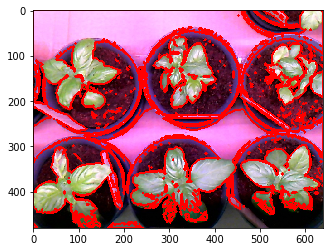

In [172]:
plt.imshow(cv2.cvtColor(final_image_3, cv2.COLOR_BGR2RGB))